<a href="https://colab.research.google.com/github/Jmoreno844/cd-juan-moreno-2023/blob/main/Proyecto_2_corte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import pyproj

import math
# Load the DataFrame
ruta = 'https://raw.githubusercontent.com/fmoreno4/datasets/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)


#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])

x= df['x']
y= df['y']

n = len(x)

In [36]:
import numpy as np

# Assuming you have already generated x and y values

x_min = np.min(x)
y_min = np.min(y)
x_max = np.max(x)
y_max = np.max(y)

res = 10  # Adjust the resolution as needed
cols = int(np.ceil((x_max - x_min) / res))
rows = int(np.ceil((y_max - y_min) / res))

print("Valor mínimo de x:", x_min)
print("Valor máximo de x:", x_max)
print("Valor mínimo de y:", y_min)
print("Valor máximo de y:", y_max)
print("Número de filas:", rows)
print("Número de columnas:", cols)

matriz_de_ceros = np.zeros((rows, cols))
matriz_de_sumas = np.zeros((rows, cols))

print(matriz_de_ceros)


Valor mínimo de x: 707988.5715792507
Valor máximo de x: 712363.8865034583
Valor mínimo de y: 780501.6340403266
Valor máximo de y: 785051.1759298786
Número de filas: 455
Número de columnas: 438
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [37]:
import math

# Obtener el número de Euler (e)
e = math.e

from numpy.lib.index_tricks import r_
#d = distancie*res ntre puntos , r = anchobanda , l = funcion a llamar cualquier asirve
def kernel_func(distance,res,numero_func):
    """Esta función devuelve la suma de dos números."""
    d = distance*res
    kernel = 0
    r= anchobanda
    if(numero_func == 1):
      if(d<r):
        kernel=1
    elif(numero_func == 2):
      if(d<r):
        kernel =1-d/r_
    elif(numero_func == 3):
      kernel = math.e **(-(d**2 / (2 * r**2)))
    elif(numero_func == 4):
      kernel = 1 - (d**2 / r**2)
    elif(numero_func == 5):
      kernel = math.e ** -(d/r)
    return kernel

In [38]:
for a in range(0,n):
  xtemp = math.floor((x[a]-x_min)/res)
  ytemp = math.floor((y[a]-y_min)/res)
  matriz_de_ceros[ytemp][xtemp] += 1

print(matriz_de_ceros)


anchobanda = 100

razon = math.ceil(anchobanda/res)  ##5
###esta es la funcion kde ya hecha, osea que es la funcion de sumas mas la multiplicacion por kernel
for i in range(0, rows):
    fila_ini = i - razon
    if fila_ini < 0:
      fila_ini = 0
    fila_fin = i + razon
    if fila_fin > rows - 1:
      fila_fin = rows - 1
    for j in range(0, cols):
        col_ini = j - razon
        if col_ini < 0:
          col_ini = 0
        col_fin = j + razon
        if col_fin > cols - 1:
          col_fin = cols - 1
        contador = 0
        for k in range(fila_ini, fila_fin+1):
            for l in range(col_ini, col_fin+1):
                # Compare the point (i, j) with the point (k, l)
                distance = math.sqrt((i - k) ** 2 + (j - l) ** 2)
                if distance <= razon:
                  #llamar funcion kernel , llamar cualquiera
                  kernel = kernel_func(distance, res, 1)
                  contador += matriz_de_ceros[k][l]*kernel


                matriz_de_sumas[i][j] = contador



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


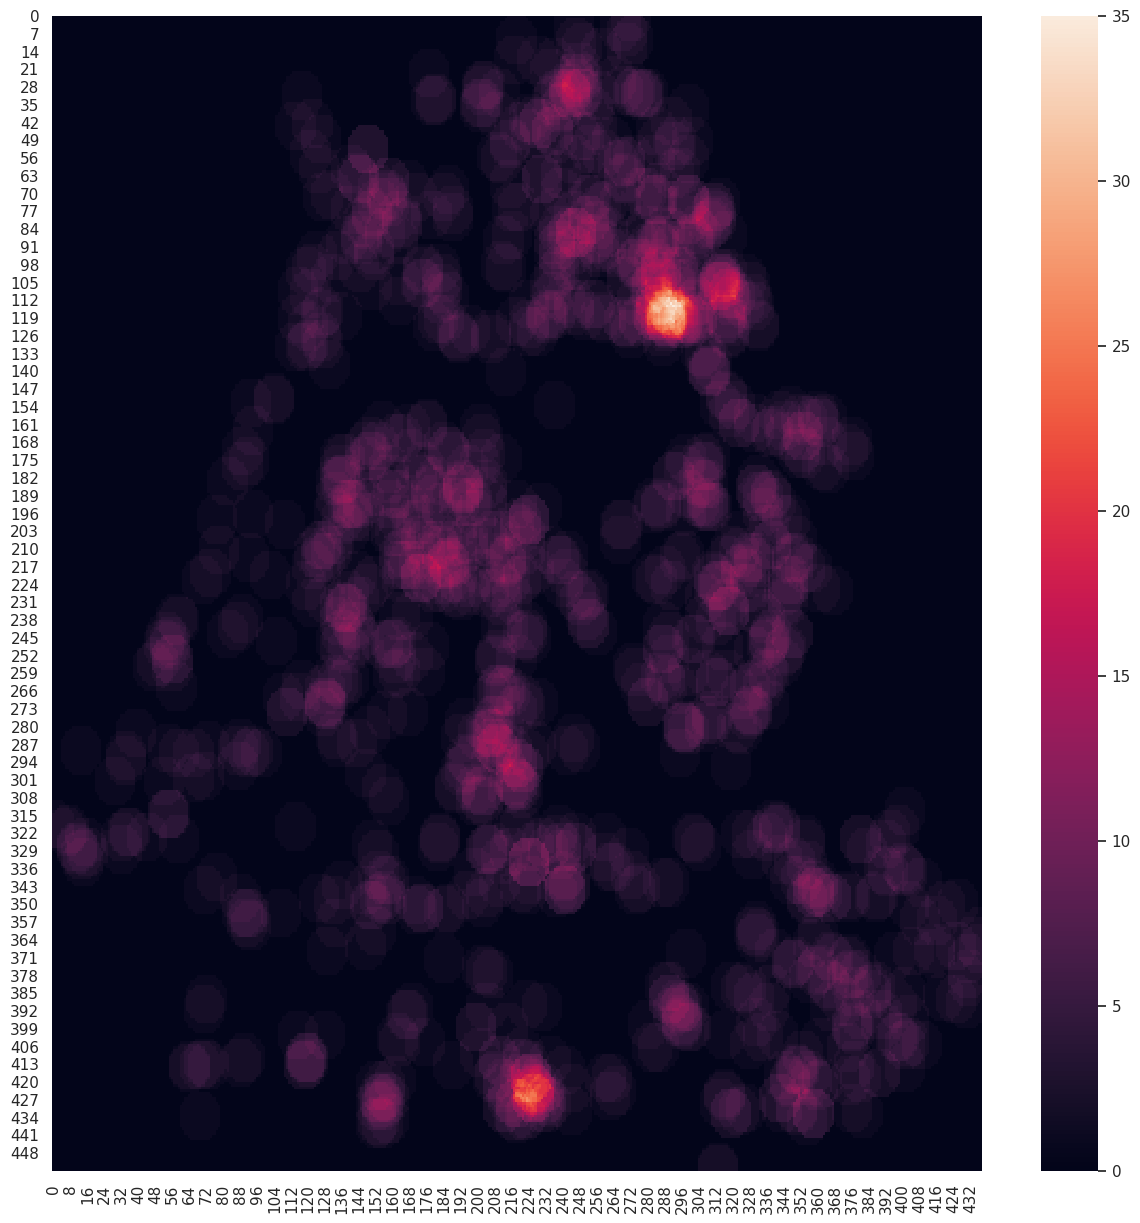

In [39]:
matriz_de_sumas = np.flipud(matriz_de_sumas)

import seaborn as sns
sns.set(rc = {'figure.figsize':(15,15)})
p=sns.heatmap(matriz_de_sumas)

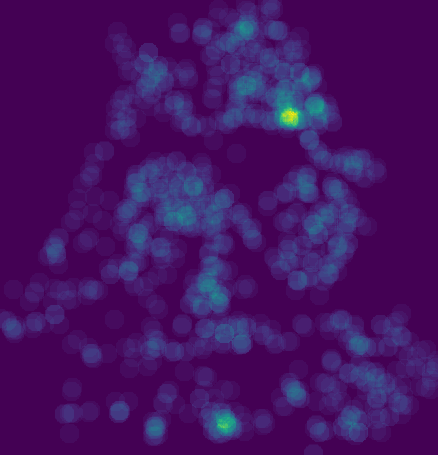

In [43]:
import matplotlib.pyplot as plt
import numpy as np


# Calcular los valores mínimo y máximo de la matriz de sumas
sumas_min = np.min(matriz_de_sumas)
sumas_max = np.max(matriz_de_sumas)

# Calcular el rango y el paso
res = 10
sumas_rango = (sumas_max - sumas_min) / res

# Crear una matriz normalizada para usarla en la colormap
matriz_normalizada = (matriz_de_sumas - sumas_min) / (sumas_max - sumas_min)

# Utilizar la colormap 'viridis' de matplotlib para asignar colores
colormap = plt.cm.viridis
colores_np = (colormap(matriz_normalizada) * 255).astype(np.uint8)[:,:,:3]

# Crear una imagen RGB a partir de la matriz de colores
imagen = Image.fromarray(colores_np)

# Guardar la imagen
imagen.save("imagen_colormap.png")

# Mostrar la imagen utilizando el visor de imágenes predeterminado del sistema
display(imagen)


In [41]:
import colorsys

def rgb_a_hsv(r, g, b):
  (h, s, v) = colorsys.rgb_to_hsv(r, g, b)
  return (h, s, v)

def hsv_a_rgb(h, s, v):
  (r, g, b) = colorsys.hsv_to_rgb(h, s, v)
  r = int(r)
  g = int(g)
  b = int(b)
  return (r, g, b)

In [42]:
from PIL import Image, ImageDraw
import numpy as np
import colorsys

def rgb_a_hsv(r, g, b):
    (h, s, v) = colorsys.rgb_to_hsv(r, g, b)
    return (h, s, v)

def hsv_a_rgb(h, s, v):
    (r, g, b) = colorsys.hsv_to_rgb(h, s, v)
    r = int(r * 255)
    g = int(g * 255)
    b = int(b * 255)
    return (r, g, b)

def pintar_color(r, g, b):
    img = Image.new('RGB', (300, 25))
    draw = ImageDraw.Draw(img)
    draw.rectangle([(0, 0), img.size], fill=(r, g, b))
    display(img)

def matriz_a_rango(matriz):
    min_valor = np.min(matriz)
    max_valor = np.max(matriz)
    rango = (max_valor - min_valor) / 10
    return min_valor, rango

def pintar_colores_interpolados(matriz):
    # Obtener el valor mínimo y el rango
    min_valor, rango = matriz_a_rango(matriz)

    # Color inicial en HSV
    hsv_ini = rgb_a_hsv(255, 0, 0)

    # Color final en HSV
    hsv_fin = rgb_a_hsv(0, 255, 0)

    n = 10

    for i in range(n):
        valor = min_valor + i * rango
        h = hsv_ini[0] + i * (hsv_fin[0] - hsv_ini[0]) / (n - 1)
        s = hsv_ini[1] + i * (hsv_fin[1] - hsv_ini[1]) / (n - 1)
        v = hsv_ini[2] + i * (hsv_fin[2] - hsv_ini[2]) / (n - 1)

        (r, g, b) = hsv_a_rgb(h, s, v)
        pintar_color(r, g, b)



# Pintar colores interpolados basados en la matriz
pintar_colores_interpolados(matriz_de_sumas)
